**Importing the required libraries**

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv
from PIL import Image 
from sklearn.model_selection import train_test_split

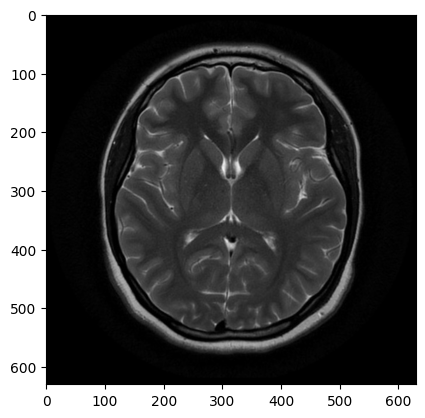

In [21]:
file_path = 'D:\\Research Projects\\Projects\\Brain-Tumor-Project\\MRI Datasets\\Training\\non-tumor\\Tr-no_0012.jpg'

if os.path.exists(file_path):
    img = mpimg.imread(file_path)
    imgplot = plt.imshow(img)
    plt.show()
else:
    print(f"File not found: {file_path}")

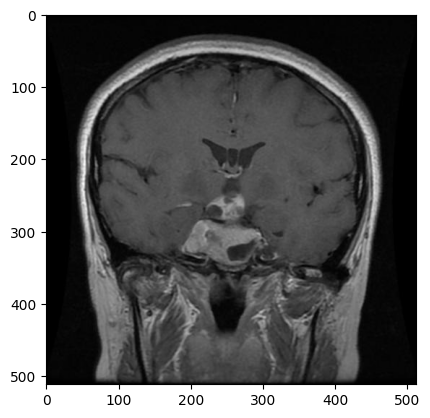

In [22]:
file_path = 'D:\\Research Projects\\Projects\\Brain-Tumor-Project\\MRI Datasets\\Training\\tumor\\Tr-pi_0016.jpg'

if os.path.exists(file_path):
    img = mpimg.imread(file_path)
    imgplot = plt.imshow(img)
    plt.show()
else:
    print(f"File not found: {file_path}")

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [23]:
import os
from PIL import Image
import numpy as np

non_tumor_path = 'D:\\Research Projects\\Projects\\Brain-Tumor-Project\\MRI Datasets\\Training\\non-tumor'
tumor_path = 'D:\\Research Projects\\Projects\\Brain-Tumor-Project\\MRI Datasets\\Training\\tumor'

non_tumor_files = os.listdir(non_tumor_path)
tumor_files = os.listdir(tumor_path)

data = []
labels = []

# For non-tumor images (label = 0)
for img_file in non_tumor_files:
    image = Image.open(non_tumor_path + '\\' + img_file)  # Use '\\' to concatenate the path
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    labels.append(0)  # Label for non-tumor images

# For tumor images (label = 1)
for img_file in tumor_files:
    image = Image.open(tumor_path + '\\' + img_file)  # Use '\\' to concatenate the path
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    labels.append(1)  # Label for tumor images

# Convert data and labels to numpy arrays
X = np.array(data)
Y = np.array(labels)

print(f"Data shape: {X.shape}")
print(f"Labels shape: {Y.shape}")

Data shape: (5712, 128, 128, 3)
Labels shape: (5712,)


In [24]:
print(Y)

[0 0 0 ... 1 1 1]


**Train Test Split**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(5712, 128, 128, 3) (4569, 128, 128, 3) (1143, 128, 128, 3)


In [27]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [28]:
X_train[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [2, 2, 2],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [3, 3, 3],
        [3, 3, 3]],

       ...,

       [[2, 2, 2],
        [3, 3, 3],
        [2, 2, 2],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[1, 1, 1],
        [1, 1, 1],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [29]:
X_train_scaled[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00784314, 0.00784314, 0.00784314],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471]],

       ...,

       [[0.00784314, 0.00784314, 0.00784314],
        [0.01176471, 0.01176471, 0.01176471],
        [0.00784314, 0

**Building a Convolutional Neural Networks (CNN)**

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [32]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [33]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - acc: 0.7697 - loss: 0.5000 - val_acc: 0.9650 - val_loss: 0.1203
Epoch 2/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 22s 169ms/step - acc: 0.9569 - loss: 0.1467 - val_acc: 0.9628 - val_loss: 0.0994
Epoch 3/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 22s 170ms/step - acc: 0.9687 - loss: 0.1067 - val_acc: 0.9672 - val_loss: 0.1090
Epoch 4/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 22s 170ms/step - acc: 0.9684 - loss: 0.0968 - val_acc: 0.9650 - val_loss: 0.0923
Epoch 5/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 22s 170ms/step - acc: 0.9768 - loss: 0.0672 - val_acc: 0.9672 - val_loss: 0.0870


**Model Evaluation**

In [34]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.9678 - loss: 0.1015
Test Accuracy = 0.9755030870437622


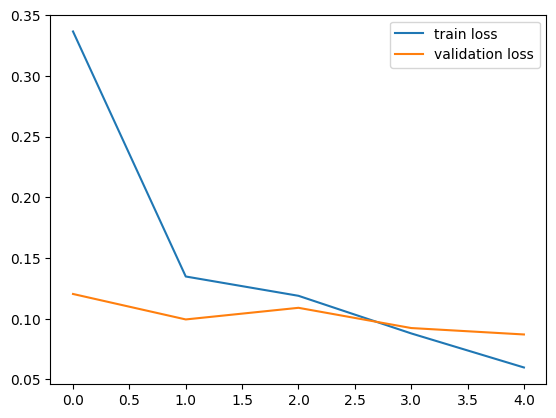

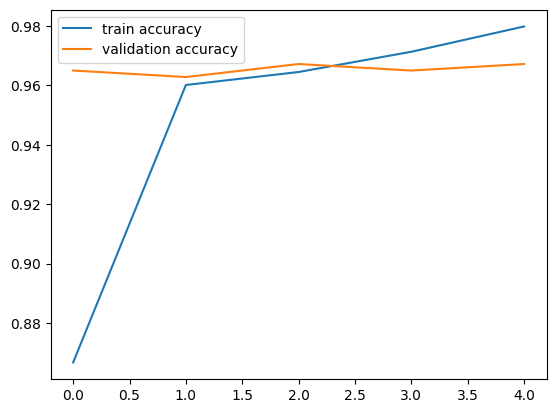

In [35]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [38]:
from PIL import Image
import numpy as np

# Input the image path
input_image_path = input('Path of the image to be predicted: ')

# Open the image using PIL
input_image = Image.open(input_image_path)

# Ensure the image is RGB (in case it's grayscale or has a different format)
input_image = input_image.convert('RGB')

# Resize the image to 128x128
input_image = input_image.resize((128, 128))

# Convert the image to a NumPy array and normalize pixel values (0-255 to 0-1)
input_image = np.array(input_image) / 255.0

# Check the shape of the image array to make sure it matches (128, 128, 3)
print("Image shape before reshaping:", input_image.shape)

# Reshape the image for model input (batch size of 1)
input_image_reshaped = np.reshape(input_image, (1, 128, 128, 3))

# Predict the class using the trained model
input_prediction = model.predict(input_image_reshaped)

# Print the prediction result
print("Model prediction:", input_prediction)

# Get the index of the highest prediction score (assumes binary classification)
input_pred_label = np.argmax(input_prediction)
print("Predicted label:", input_pred_label)

# Output the result based on the prediction label
if input_pred_label == 1:
    print('Positive')
else:
    print('Negative')

Image shape before reshaping: (128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Model prediction: [[8.3652255e-04 9.6560669e-01]]
Predicted label: 1
Positive
